# Inpainting

### This notebook introduces image inpainting of the input images. The implementation incorporates mask selection using the SAM model to select the area to be inpainted and applies diffusion by using Stable Diffusion model. In this notebook, we will provide a step-by-step guide to inpainting image.

Define an  input image

In [1]:
from PIL import Image
import os, sys

input_path = '../inputs/restyling/bear.png'
input_image = Image.open(input_path).convert("RGB")

current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(os.path.dirname(current_dir), '..'))
sys.path.append(os.path.join(parent_dir, 'code'))

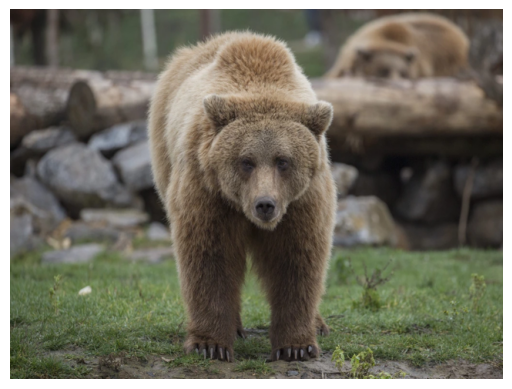

In [2]:
from matplotlib import pyplot as plt

plt.imshow(input_image)
plt.axis('off')
plt.show()

Create a mask image using SAM

In [3]:
from mask_sam import get_mask
import numpy as np

input_image_array = np.array(input_image)
mask_image = get_mask(input_image_array, ([[[300, 200]]]))
mask_array = np.where(mask_image, 255, 0).astype(np.uint8)
pil_mask = Image.fromarray(mask_array)

/usr/prakt/s0075/miniconda3/envs/image-editing-env/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


RuntimeError: CUDA error: out of memory
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


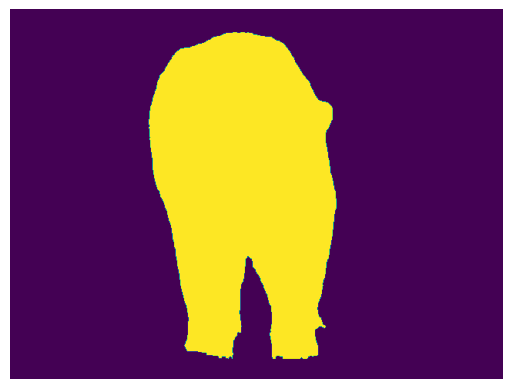

In [ ]:
plt.imshow(mask_image)
plt.axis('off')
plt.show()

Define the prompt for the inpainting

In [ ]:
prompt = "astronaut, white suit, detailed, high quality, consistent with surroundings, \
        artstation, 8 k, extremely detailed, ornate, cinematic lighting, vivid"

Infer the model on a resized input image

In [ ]:
import torch
from diffusers import AutoPipelineForInpainting

input_image = input_image.convert("RGB")
original_width, original_height = input_image.size
input_image = input_image.resize((512, 512))

mask_image = pil_mask.convert("L")
mask_image = mask_image.resize(input_image.size)

pipeline = AutoPipelineForInpainting.from_pretrained(
    "runwayml/stable-diffusion-inpainting",
    variant="fp16",
    torch_dtype=torch.float16,
)
pipeline.enable_model_cpu_offload()
image = pipeline(prompt=prompt, image=input_image, mask_image=mask_image).images[0]

image_resized = image.resize((original_width, original_height))

D:\Studies TUM\SS24\AFM\image-editing\diffusers\src\diffusers\models\transformers\transformer_2d.py:34: FutureWarning: `Transformer2DModelOutput` is deprecated and will be removed in version 1.0.0. Importing `Transformer2DModelOutput` from `diffusers.models.transformer_2d` is deprecated and this will be removed in a future version. Please use `from diffusers.models.modeling_outputs import Transformer2DModelOutput`, instead.
  deprecate("Transformer2DModelOutput", "1.0.0", deprecation_message)
D:\Studies TUM\SS24\AFM\image-editing\diffusers\src\diffusers\models\vq_model.py:20: FutureWarning: `VQEncoderOutput` is deprecated and will be removed in version 0.31. Importing `VQEncoderOutput` from `diffusers.models.vq_model` is deprecated and this will be removed in a future version. Please use `from diffusers.models.autoencoders.vq_model import VQEncoderOutput`, instead.
  deprecate("VQEncoderOutput", "0.31", deprecation_message)
D:\Studies TUM\SS24\AFM\image-editing\diffusers\src\diffusers\

model_index.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

c:\Users\nobis\anaconda3\envs\image-editing-env\lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\nobis\.cache\huggingface\hub\models--runwayml--stable-diffusion-inpainting. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/748 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.78k [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/748 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/608M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

D:\Studies TUM\SS24\AFM\image-editing\diffusers\src\diffusers\models\attention_processor.py:1416: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  hidden_states = F.scaled_dot_product_attention(


  0%|          | 0/50 [00:00<?, ?it/s]

D:\Studies TUM\SS24\AFM\image-editing\diffusers\src\diffusers\image_processor.py:110: RuntimeWarning: invalid value encountered in cast
  images = (images * 255).round().astype("uint8")
Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


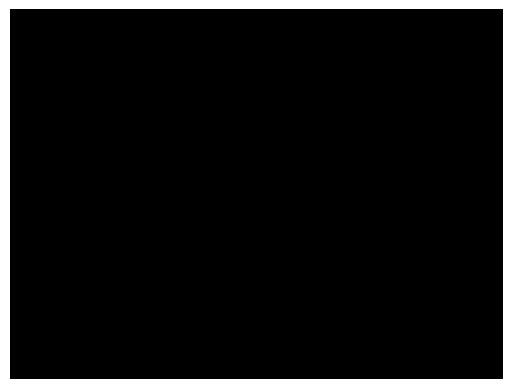

In [ ]:
plt.imshow(image_resized)
plt.axis('off')
plt.show()

Visualize the result

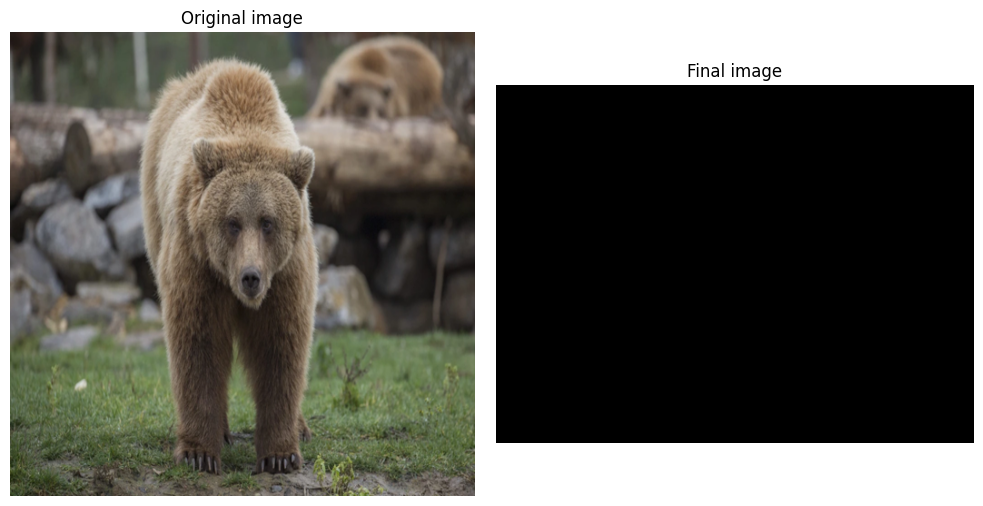

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(input_image)
axs[0].axis('off')
axs[0].set_title('Original image')

# Display the second image in the right subplot
axs[1].imshow(image_resized)
axs[1].axis('off')
axs[1].set_title('Final image')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()